# Neural Networks

* What are neural networks?
* What are CNNs?
* Terminologies used in the neural networks.

# What are neural networks?
## Neural networks are generally abbreviated as ANNs. These are the neurons in a connected network.

## These networks are in layers.
## Example: Input Layer -> Hidden Layer 1 -> Hidden Layer 2 -> Output Layer.
* In case of this example there are 2 hidden layers, 1 input layer and 1 output layer in the neural network. we call each neuron a node, the connection/ channel between the nodes is associated with weights.
* Each node has an activation function.
* The activation functions can generally be either sigmoid or relu.

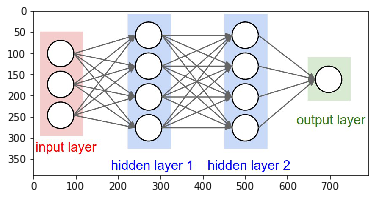

In [14]:
#Example

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

im = mpimg.imread("ann.jpeg")
plt.imshow(im)
plt.show()

* In the above figure, each output to the node is the summation of the inputs multiplied with their weights.
* The output of the node is fed to the sucessive nodes and this goes on till the output layer is achieved.

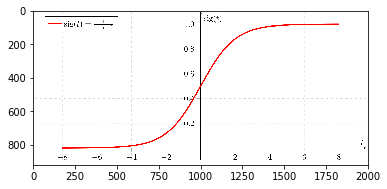

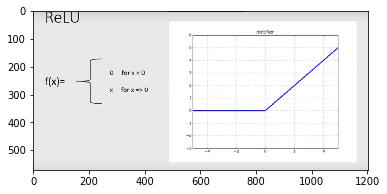

In [5]:
sigim = mpimg.imread('sig.png')
reluim = mpimg.imread('relu.png')
plt.imshow(sigim)
plt.show()
plt.imshow(reluim)
plt.show()

# From the above 2 activation functions, the relu function is comparable to the activation function of the human neurons, so it is mostly used in the following examples.

# MNIST Dataset.
* This dataset consists of handwritten digits from 0 to 9, which we can use as our training base to train our model.
* We will learn the terminologies involved and about CNNs as we proceed with the implementation of our model to identify the hand written digits.
* In the MNIST Dataset, each image in this dataset is 28x28 grayscale image (only one channel).
* In order to create the feature vectors, the pre processing of the image is done as it is coverted to 784x1.
* after flattening the image we will be getting a 1D input vector.

# We will be using Keras library to create our model, which uses tensorflow as a backend.
# Tensorflow is developed by google to solve various machine learning problems.
# Tensorflow:
* TensorFlow is a programming system in which you represent computations as graphs. Nodes in the graph are called ops (short for operations). An op takes zero or more Tensors , performs some computation, and produces zero or more Tensors . In TensorFlow terminology, a Tensor is a typed multi-dimensional array.

# Hand written digit recognition usig Keras.

## Import all the libraries required.

In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
#SGD refers to stochaistic gradient descent, it is mainly used to define the learning rate.
#np.random.seed(1)
#To generate the same set of random number all the time, we need to define seed.

#import MNIST Dataset
from keras.datasets import mnist
(train_x, train_y),(test_x, test_y) = mnist.load_data()
_,img_rows,img_cols = train_x.shape
print("\n"+"The size of the image is : "+ str(img_rows) + " x " + str(img_cols))


The size of the image is : 28 x 28


In [16]:
#Number of digits are
digits = np.unique(train_y)
num_digits = len(digits)
num_pixels = img_rows*img_cols
print("The digits are : "+ str(digits))
print("The number of digits are : "+ str(num_digits))

The digits are : [0 1 2 3 4 5 6 7 8 9]
The number of digits are : 10


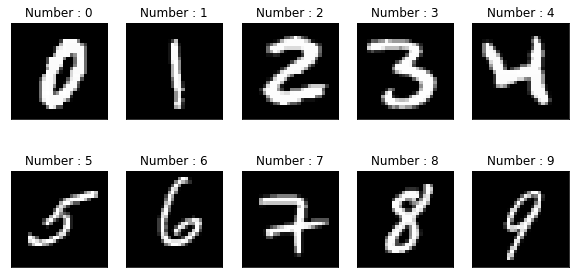

In [17]:
#Plotting the unique digits
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
for i in range(num_digits):
    ax = fig.add_subplot(2,5,1+i,xticks=[],yticks=[])
    features_idx = train_x[train_y[:]==i,:]
    ax.set_title("Number : "+str(i))
    plt.imshow(features_idx[2] , cmap="gray")
plt.show()

In [18]:
#Flattening the train and test feature vectors
from keras.utils import np_utils
train_x = train_x.reshape(train_x.shape[0],num_pixels)
test_x = test_x.reshape(test_x.shape[0],num_pixels)

train_y = np_utils.to_categorical(train_y,num_digits)
test_y = np_utils.to_categorical(test_y,num_digits)

## Softmax function
* In mathematics, the softmax function, or normalized exponential function, is a generalization of the logistic function that "squashes" a K-dimensional vector of arbitrary real values to a K-dimensional vector of real values in the range [0, 1] that add up to 1.

In [19]:
def ann():
    model = Sequential()
    model.add(Dense(100, input_dim=num_pixels))
    model.add(Activation('sigmoid'))
    model.add(Dense(num_digits))
    model.add(Activation('softmax'))
    return model
    
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [20]:
model = ann()
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss="mse", metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [21]:
import time
start = time.time()
model_info = model.fit(train_x,train_y, batch_size=50, epochs=10, verbose=2, validation_split=0.2)
end = time.time()
print("The time took for the model to train is: "+str(end-start))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
2s - loss: 0.0837 - acc: 0.2723 - val_loss: 0.0751 - val_acc: 0.4084
Epoch 2/10
2s - loss: 0.0688 - acc: 0.4823 - val_loss: 0.0630 - val_acc: 0.5488
Epoch 3/10
2s - loss: 0.0590 - acc: 0.5845 - val_loss: 0.0547 - val_acc: 0.6263
Epoch 4/10
2s - loss: 0.0520 - acc: 0.6519 - val_loss: 0.0484 - val_acc: 0.6848
Epoch 5/10
2s - loss: 0.0465 - acc: 0.7038 - val_loss: 0.0431 - val_acc: 0.7354
Epoch 6/10
2s - loss: 0.0420 - acc: 0.7444 - val_loss: 0.0389 - val_acc: 0.7760
Epoch 7/10
2s - loss: 0.0382 - acc: 0.7787 - val_loss: 0.0354 - val_acc: 0.8025
Epoch 8/10
2s - loss: 0.0350 - acc: 0.8057 - val_loss: 0.0324 - val_acc: 0.8259
Epoch 9/10
2s - loss: 0.0323 - acc: 0.8248 - val_loss: 0.0300 - val_acc: 0.8432
Epoch 10/10
2s - loss: 0.0301 - acc: 0.8397 - val_loss: 0.0280 - val_acc: 0.8543
The time took for the model to train is: 21.34231209754944


In [22]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

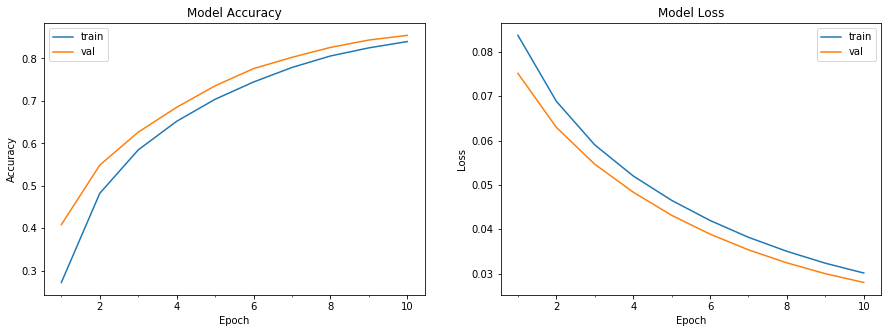

In [23]:
plot_model_history(model_info)

## Calculating using adam optimizer where learning rate is not constant.

In [10]:
model1 = ann()
model1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
startA = time.time()
model_adam_info = model1.fit(train_x, train_y, batch_size=60, verbose=2, epochs=10, validation_split=0.2)
endA = time.time()
print("The time taken for the model to train using adam optimizer is : " +str(endA-startA))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
2s - loss: 0.0286 - acc: 0.8221 - val_loss: 0.0166 - val_acc: 0.8992
Epoch 2/10
2s - loss: 0.0167 - acc: 0.8979 - val_loss: 0.0152 - val_acc: 0.9042
Epoch 3/10
2s - loss: 0.0153 - acc: 0.9031 - val_loss: 0.0140 - val_acc: 0.9091
Epoch 4/10
2s - loss: 0.0147 - acc: 0.9065 - val_loss: 0.0134 - val_acc: 0.9147
Epoch 5/10
2s - loss: 0.0138 - acc: 0.9124 - val_loss: 0.0135 - val_acc: 0.9127
Epoch 6/10
2s - loss: 0.0130 - acc: 0.9161 - val_loss: 0.0138 - val_acc: 0.9116
Epoch 7/10
2s - loss: 0.0136 - acc: 0.9118 - val_loss: 0.0130 - val_acc: 0.9158
Epoch 8/10
2s - loss: 0.0136 - acc: 0.9108 - val_loss: 0.0139 - val_acc: 0.9104
Epoch 9/10
2s - loss: 0.0133 - acc: 0.9137 - val_loss: 0.0130 - val_acc: 0.9149
Epoch 10/10
2s - loss: 0.0132 - acc: 0.9146 - val_loss: 0.0126 - val_acc: 0.9164
The time taken for the model to train using adam optimizer is : 22.530164003372192


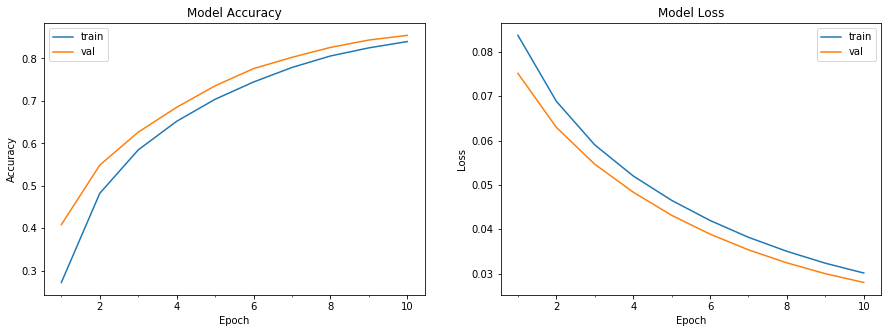

The accuracy of the model using sigmoid activation and adam optimizer is: 84.42


In [24]:
plot_model_history(model_info)
print("The accuracy of the model using sigmoid activation and adam optimizer is: " + str(accuracy(test_x, test_y, model)))

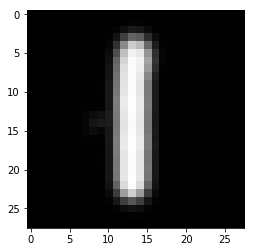

(28, 28)
1/1 [==============================] - 0s
The image which has been tested is: [1]


In [32]:

from PIL import Image
testimage = Image.open('1.png').convert('L')
ti = mpimg.imread('1.png')
plt.imshow(ti, cmap="gray")
plt.show()
test_array = np.array(testimage)
print(test_array.shape)
result = model.predict_classes(test_array.reshape((1,28*28)))
print("The image which has been tested is: " + str(result))

# https://www.youtube.com/watch?v=vq2nnJ4g6N0
## This has the tensorflow explained in detail.

# As we have destroyed the shape information i.e, we converted 28x28 image to 1x784, in order to restore the shape data or data in which shape or some other data is also important, in that case we will be using convolutional neural networks.

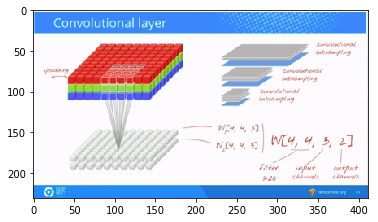

In [50]:
import matplotlib.image as mpimg
cnn = mpimg.imread('CNN.png')
plt.imshow(cnn)
plt.show()

# Maxpooling is explained in the below figure.

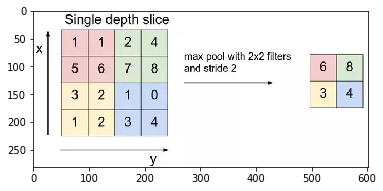

In [51]:
maxpool = mpimg.imread('maxpooling.png')
plt.imshow(maxpool)
plt.show()